In [6]:
class my_LinearDiscriminantAnalysis():
    def __init__(self):
        self.class_number = 0
        self.argwhere_matrix = []
        self.pi_hat = []
        self.mu_hat = []
        self.covar_matrix = []
        pass
    
    def fit(self, x, y):
        self.class_number = np.unique(y)
        self.covar_matrix = np.zeros((x.shape[1], x.shape[1]))
        
        for i in self.class_number:
            self.argwhere_matrix.append(np.reshape(np.argwhere(np.array(y) == i), -1))
            self.pi_hat.append(len(np.argwhere(y == i))/len(y))
            self.mu_hat.append(np.mean(x[self.argwhere_matrix[i]], axis = 0))
            self.covar_matrix += np.cov(x[self.argwhere_matrix[i]].T)
        pass
    
    def predict_prob(self, x):
        self.inv_prod = []
        self.pred_vector = []
        for i in self.class_number:
            self.inv_prod = np.dot(np.linalg.inv(self.covar_matrix), self.mu_hat[i])
            self.pred_vector.append(np.dot(x, self.inv_prod) + np.log(self.pi_hat[i]) - 1/2*np.dot(self.mu_hat[i], self.inv_prod))
        return self.pred_vector
    
    def predict(self, x):
        self.y_pred = []
        for i in range(len(x)):
            self.y_pred.append(np.argmax(self.predict_prob(x[i])))
        return np.array(self.y_pred)
    
    def score(self, x, y):
        self.pred = self.predict(x)
        self.acc = len(np.argwhere((self.pred - np.array(y)) == 0))/len(y)
        return self.acc
    
    def plot(self, x, y):
        if X.shape[1] == 2:
            for j in np.unique(y):
                plt.scatter(x[y == j, 0], x[y == j, 1])
                plt.xlabel('feature 1')
                plt.ylabel('feature 2')
            plt.show()
        else:
            print("We have only one OR more than two features. 2D plotting is not possible.")
        pass

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class0_len = 2000
X0 = np.random.multivariate_normal([1,2,-1], np.array([[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]), size=class0_len)
y0 = [0]*class0_len

class1_len = 3000
X1 = np.random.multivariate_normal([1,1,0], np.array([[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]), size=class1_len)
y1 = [1]*class1_len

X = np.concatenate((X0, X1))
y = y0+y1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

# my LDA model

my_lda = my_LinearDiscriminantAnalysis()
my_model = my_lda.fit(X_train, y_train)
predictions = my_lda.predict(X_test)
predictions

array([0, 1, 1, ..., 0, 1, 1])

In [3]:
np.array(y_test)

array([0, 1, 1, ..., 0, 1, 1])

In [4]:
#scores
my_lda = my_LinearDiscriminantAnalysis()
my_model = my_lda.fit(X_train, y_train)
predictions = my_lda.predict(X_train)

print("my score on the train data:", my_lda.score(X_train, y_train))
print("my score on the test data:", my_lda.score(X_test, y_test))

# comparing with the sklearn's one
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

print("sklearn's score on the train data:", clf.score(X_train, y_train))
print("sklearn's score on the test data:", clf.score(X_test, y_test))

my score on the train data: 0.9874666666666667
my score on the test data: 0.9864
sklearn's score on the train data: 0.9885333333333334
sklearn's score on the test data: 0.9888


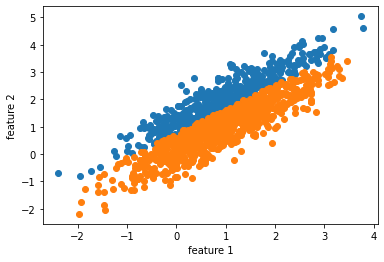

In [5]:
# some plot for 2-feature case
class0_len = 2000
X0 = np.random.multivariate_normal([1,2], np.array([[1, 0.9], [0.9, 1]]), size=class0_len)
y0 = [0]*class0_len

class1_len = 3000
X1 = np.random.multivariate_normal([1,1], np.array([[1, 0.9], [0.9, 1]]), size=class1_len)
y1 = [1]*class1_len

X = np.concatenate((X0, X1))
y = y0+y1


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

# my LDA model
my_lda = my_LinearDiscriminantAnalysis()
my_model = my_lda.fit(X_train, y_train)
predictions = my_lda.predict(X_test)

my_lda.plot(X_test, predictions)

In [ ]:
######### Quadratic Discriminant Analysis

In [1]:
class my_QuadraticDiscriminantAnalysis():
    def __init__(self):
        self.class_number = 0
        self.argwhere_matrix = []
        self.pi_hat = []
        self.mu_hat = []
        self.covar_matrix = []
        pass
    
    def fit(self, x, y):
        self.class_number = np.unique(y)

        for i in self.class_number:
            self.argwhere_matrix.append(np.reshape(np.argwhere(np.array(y) == i), -1))
            self.pi_hat.append(len(np.argwhere(y == i))/len(y))
            self.mu_hat.append(np.mean(x[self.argwhere_matrix[i]], axis = 0))
            self.covar_matrix.append(np.cov(x[self.argwhere_matrix[i]].T))
        pass
    
    def predict_prob(self, x):
        self.pred_vector = []
        for i in self.class_number:
            self.pred_vector.append(- 1/2*np.log(np.linalg.det(self.covar_matrix[i])) - 1/2*np.dot(x - self.mu_hat[i], np.dot(np.linalg.inv(self.covar_matrix[i]), x - self.mu_hat[i])) + np.log(self.pi_hat[i]))
        return self.pred_vector
    
    def predict(self, x):
        self.y_pred = []
        for i in range(len(x)):
            self.y_pred.append(np.argmax(self.predict_prob(x[i])))
        return np.array(self.y_pred)
    
    def score(self, x, y):
        self.pred = self.predict(x)
        self.acc = len(np.argwhere((self.pred - np.array(y)) == 0))/len(y)
        return self.acc
    
    def plot(self, x, y):
        if X.shape[1] == 2:
            for j in np.unique(y):
                plt.scatter(x[y == j, 0], x[y == j, 1])
                plt.xlabel('feature 1')
                plt.ylabel('feature 2')
            plt.show()
        else:
            print("We have only one OR more than two features. 2D plotting is not possible.")
        pass

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class0_len = 1000
X0 = np.random.multivariate_normal([1,2,0], np.array([[1, 0.9, 0.9], [0.9, 1, 0.9], [0.9, 0.9, 1]]), size=class0_len)
y0 = [0]*class0_len

class1_len = 3000
X1 = np.random.multivariate_normal([1,1,0], np.array([[1, 0.4, 0.2], [0.4, 1, 0.8], [0.2, 0.8, 1]]), size=class1_len)
y1 = [1]*class1_len

X = np.concatenate((X0, X1))
y = y0+y1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

# my QDA model

my_qda = my_QuadraticDiscriminantAnalysis()
my_model = my_qda.fit(X_train, y_train)
predictions = my_qda.predict(X_train)
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [3]:
np.array(y_train)

array([1, 0, 1, ..., 1, 0, 0])

In [4]:
#scores
my_qda = my_QuadraticDiscriminantAnalysis()
my_model = my_qda.fit(X_train, y_train)
predictions = my_qda.predict(X_train)

print("my score on the train data:", my_qda.score(X_train, y_train))
print("my score on the test data:", my_qda.score(X_test, y_test))

# comparing with the sklearn's one
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

print("sklearn's score on the train data:", clf.score(X_train, y_train))
print("sklearn's score on the test data:", clf.score(X_test, y_test))

my score on the train data: 0.8966666666666666
my score on the test data: 0.908
sklearn's score on the train data: 0.8966666666666666
sklearn's score on the test data: 0.908


In [7]:
# my LDA for this case
my_lda = my_LinearDiscriminantAnalysis()
my_model_linear = my_lda.fit(X_train, y_train)
predictions_linear = my_lda.predict(X_train)

print("score on the train data:", my_lda.score(X_train, y_train))
print("score on the test data:", my_lda.score(X_test, y_test))

score on the train data: 0.8423333333333334
score on the test data: 0.865


my lda score on the train data: 0.7646666666666667
my lda score on the test data: 0.775
my qda score on the train data: 0.785
my qda score on the test data: 0.783
LDA


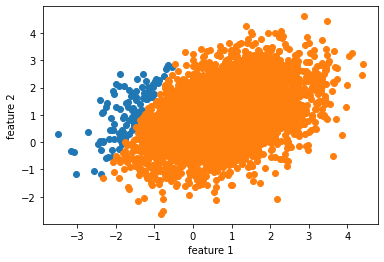

QDA


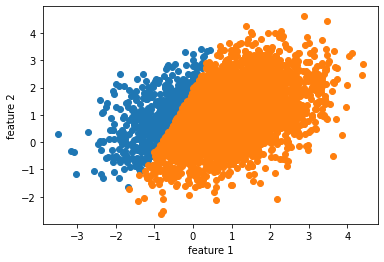

true


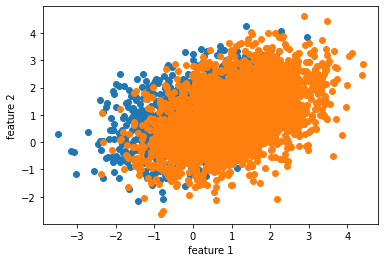

In [23]:
# some plot for 2-feature case
class0_len = 1000
X0 = np.random.multivariate_normal([0,1], np.array([[1, 0.4], [0.4, 1]]), size=class0_len)
y0 = [0]*class0_len

class1_len = 3000
X1 = np.random.multivariate_normal([1,1], np.array([[1, 0.4], [0.4, 1]]), size=class1_len)
y1 = [1]*class1_len

X = np.concatenate((X0, X1))
y = y0+y1


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)


# my LDA model
my_lda = my_LinearDiscriminantAnalysis()
my_model_linear = my_lda.fit(X_train, y_train)
predictions_linear = my_lda.predict(X_test)

# my QDA model
my_qda = my_QuadraticDiscriminantAnalysis()
my_model_quadratic = my_qda.fit(X_train, y_train)
predictions_quadratic = my_qda.predict(X_test)

# my LDA for this case
print("my lda score on the train data:", my_lda.score(X_train, y_train))
print("my lda score on the test data:", my_lda.score(X_test, y_test))

print("my qda score on the train data:", my_qda.score(X_train, y_train))
print("my qda score on the test data:", my_qda.score(X_test, y_test))

print("LDA")
my_lda.plot(X, my_lda.predict(X))

print("QDA")
my_qda.plot(X, my_qda.predict(X))

print("true")
my_qda.plot(X, y)